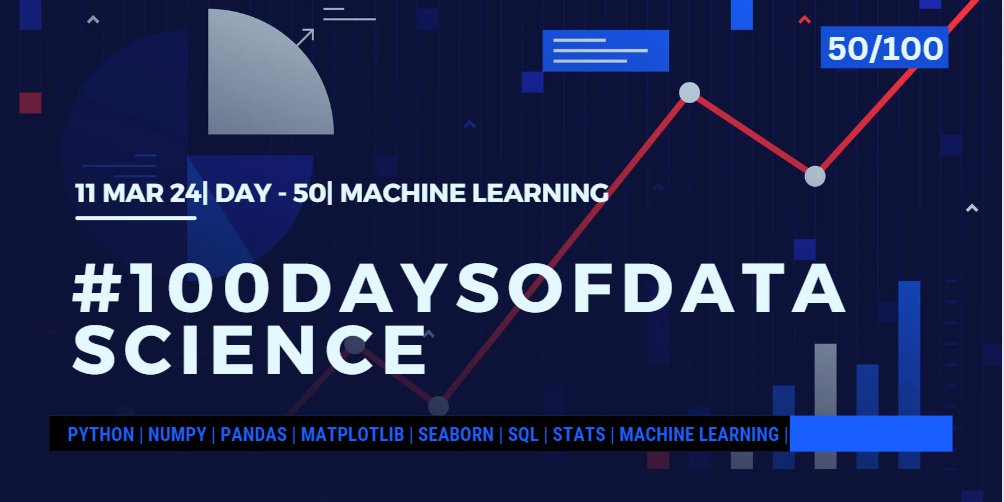

# <center>Random Forest(RF)<center><hr style="border:4.5px solid #108999"></hr>
    
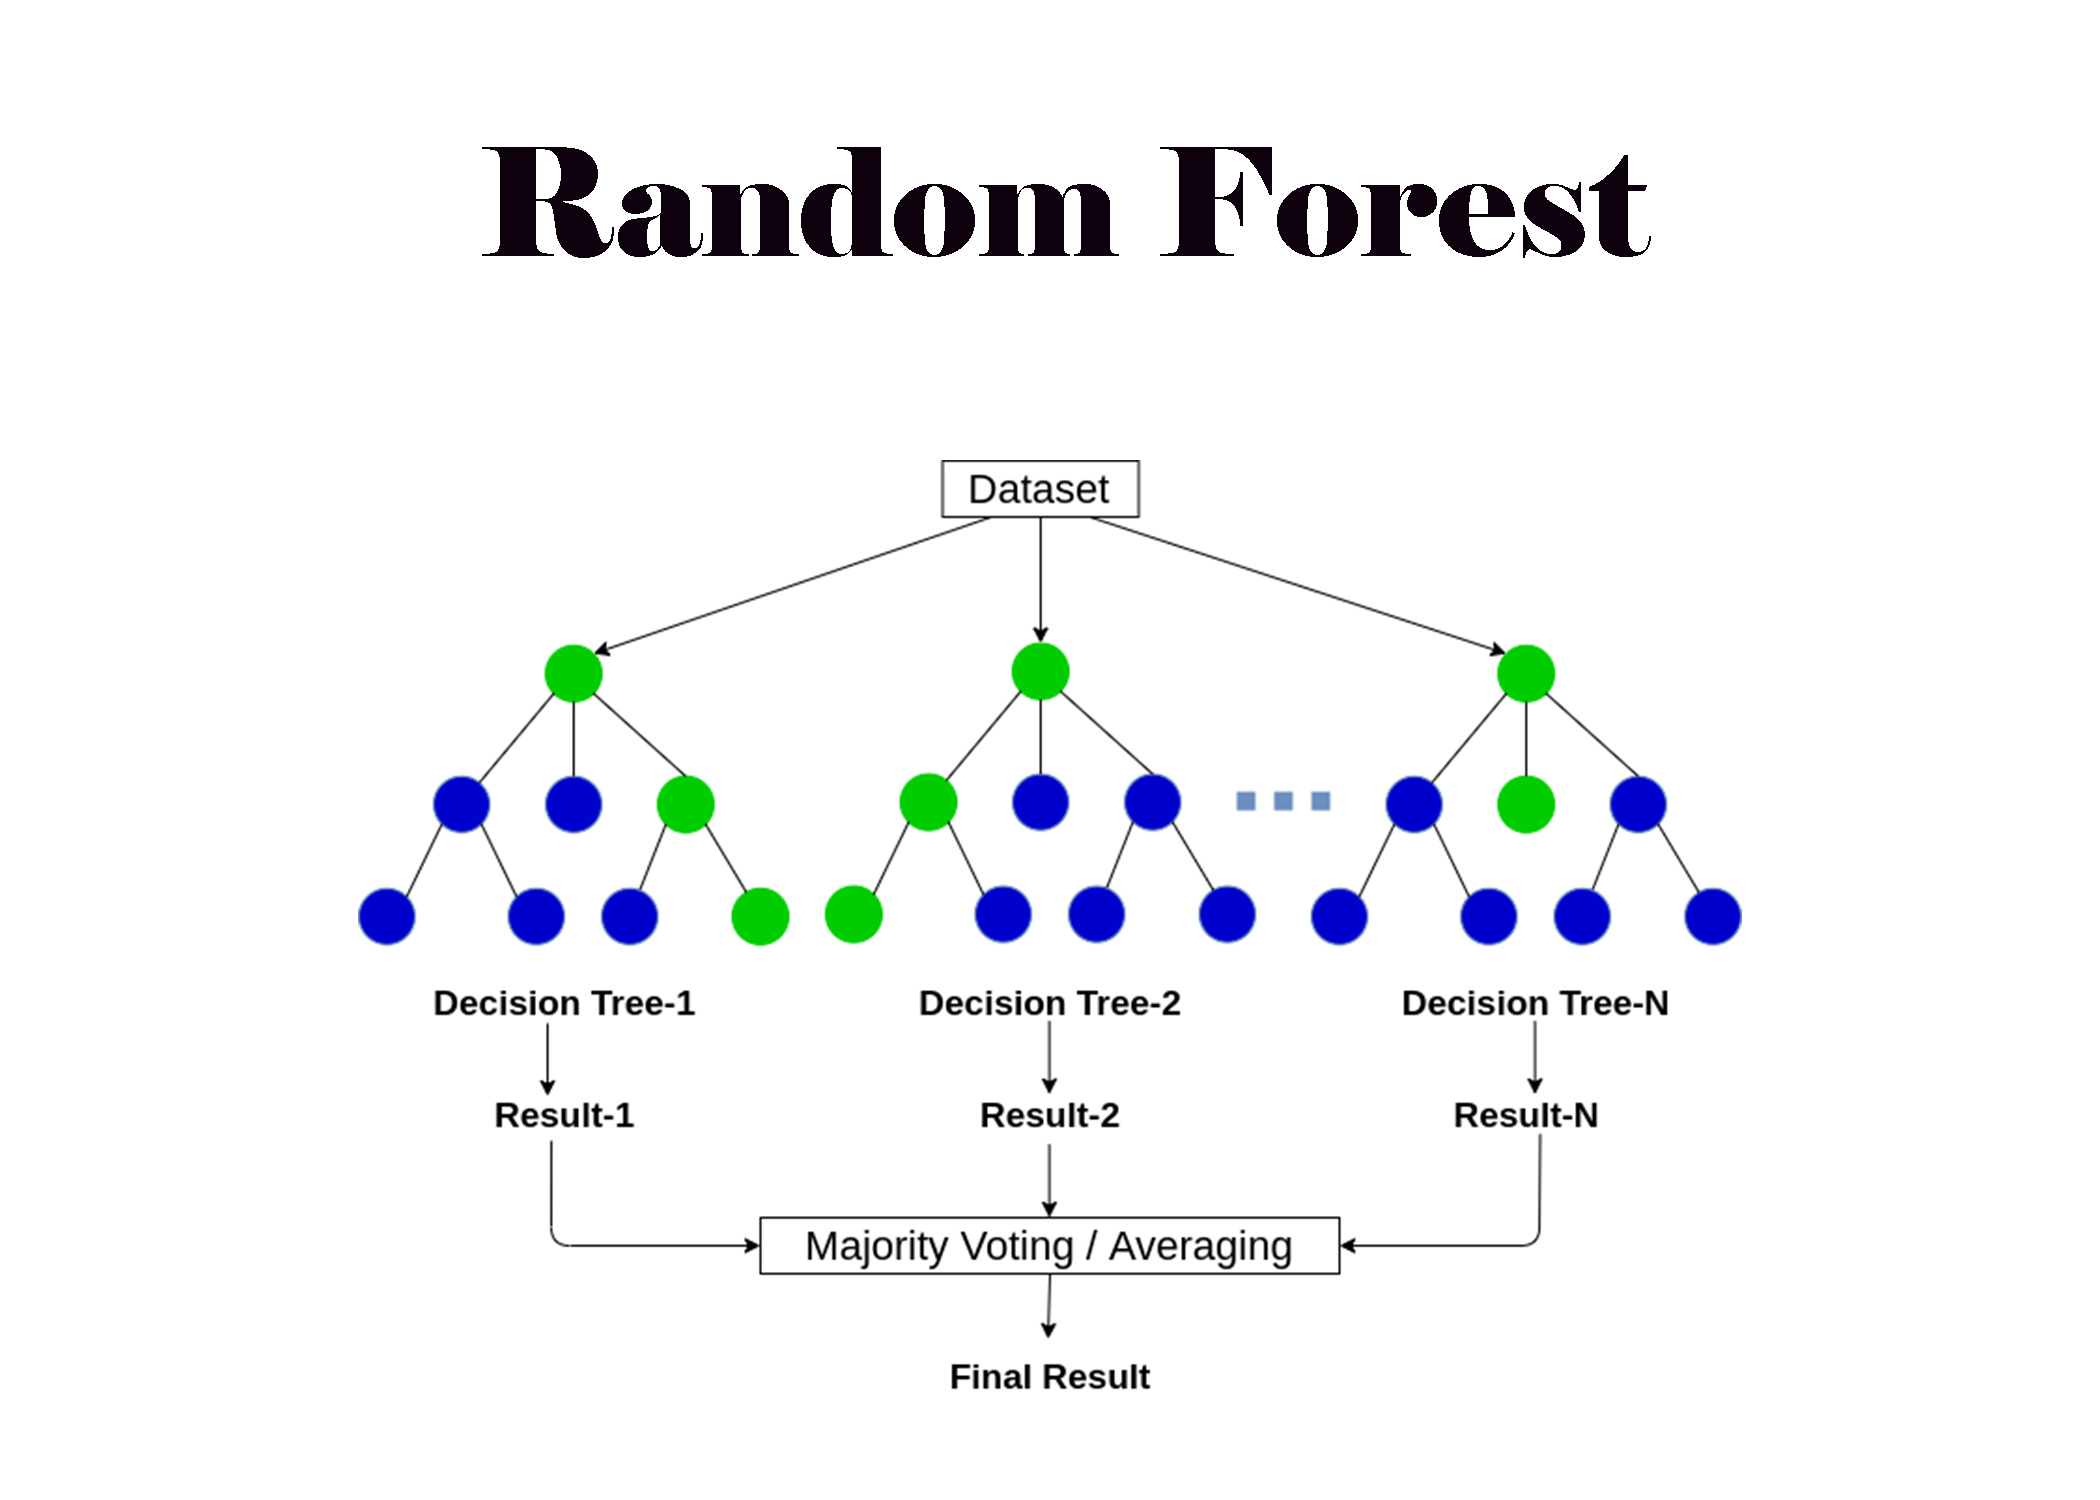

* Random Forest is a widely-used machine learning algorithm which combines the output of multiple decision trees to reach a single result. 
* Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.
* A Random Forest is like a group decision-making team in machine learning. 
* It combines the opinions of many “trees” (individual models) to make better predictions, creating a more robust and accurate overall model.
* The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees.
* Feature randomness, also known as feature bagging generates a random subset of features, which ensures low correlation among decision trees.
    
* <b>Advantages</b>
    - <b>Improved Accuracy:</b> By combining the predictions of multiple trees, Random Forests often achieve higher accuracy compared to single decision trees. The ensemble reduces the variance of the model, leading to more robust predictions that generalize well to unseen data.
    - <b>Reduced Overfitting:</b> The randomness introduced during tree construction prevents individual trees from becoming overly specialized to the training data, mitigating the issue of overfitting that can plague single decision trees.
    - <b>Handles Missing Data:</b> Similar to decision trees, Random Forests can handle missing data inherently. The bootstrapping process naturally addresses missing values by allowing trees to be built even if some data points have missing features.
    - <b>Feature Importance:</b> Random Forests provide valuable insights into feature importance. By analyzing how often each feature is selected for splitting across the ensemble, we can gauge their relative significance in making predictions.

* <b>Disadvantages</b>
    - <b>Black Box Tendencies:</b> While more interpretable than some algorithms like neural networks, Random Forests can still be considered a black box to some extent. Understanding the inner workings of the entire ensemble might be more challenging compared to a single decision tree.
    - <b>Computational Cost:</b> Training Random Forests can be computationally expensive due to the construction of numerous decision trees. This can be a consideration for very large datasets or resource-constrained environments.
    - <b>Tuning Hyperparameters:</b> Random Forests have several hyperparameters that can influence their performance. Tuning these parameters effectively requires experimentation and validation techniques.

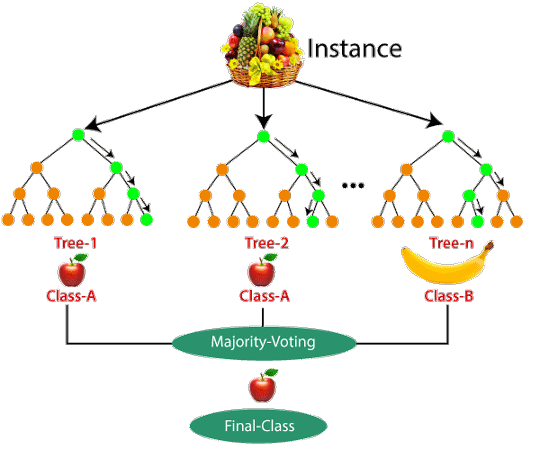

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 50\car.data',header=0)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.shape ### Checking Shape

(1727, 7)

In [4]:
df.describe() ### Get information of the Dataset

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
df.columns ### Checking Columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.isnull().sum() ### Checking Null Values in the Data

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [8]:
df.columns = ['BUYING','MAINT','DOORS','PERSONS','LUG_BOOT','SAFETY','CLASSES']
df.tail()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASSES
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [9]:
df1 = pd.DataFrame.copy(df)
df1.shape

(1727, 7)

In [10]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'BUYING': array(['vhigh', 'high', 'med', 'low'], dtype=object)}
{'MAINT': array(['vhigh', 'high', 'med', 'low'], dtype=object)}
{'DOORS': array(['2', '3', '4', '5more'], dtype=object)}
{'PERSONS': array(['2', '4', 'more'], dtype=object)}
{'LUG_BOOT': array(['small', 'med', 'big'], dtype=object)}
{'SAFETY': array(['med', 'high', 'low'], dtype=object)}
{'CLASSES': array(['unacc', 'acc', 'vgood', 'good'], dtype=object)}


In [11]:
### Finding categorical variables
colname = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(colname)))
print('The categorical variables are :', colname)

There are 7 categorical variables

The categorical variables are : ['BUYING', 'MAINT', 'DOORS', 'PERSONS', 'LUG_BOOT', 'SAFETY', 'CLASSES']


In [12]:
### Converting all categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname:
    df1[x]=le.fit_transform(df1[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature",x)
    print("Mapping", le_name_mapping)

Feature BUYING
Mapping {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
Feature MAINT
Mapping {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
Feature DOORS
Mapping {'2': 0, '3': 1, '4': 2, '5more': 3}
Feature PERSONS
Mapping {'2': 0, '4': 1, 'more': 2}
Feature LUG_BOOT
Mapping {'big': 0, 'med': 1, 'small': 2}
Feature SAFETY
Mapping {'high': 0, 'low': 1, 'med': 2}
Feature CLASSES
Mapping {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


In [13]:
df2 = df1.copy()
df2.columns

Index(['BUYING', 'MAINT', 'DOORS', 'PERSONS', 'LUG_BOOT', 'SAFETY', 'CLASSES'], dtype='object')

In [14]:
### Spliting Data into X and y
X = df2.values[:,:-1]
y = df2.values[:,1]
print('X:',X.shape)
print('*' * 13)
print('y:',y.shape)

X: (1727, 6)
*************
y: (1727,)


In [15]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#x = scaler.fit_transform(x)
print(X)

[[ 1.34272909e+00  1.34272909e+00 -1.34272909e+00 -1.22563179e+00
   1.22563179e+00  1.22439044e+00]
 [ 1.34272909e+00  1.34272909e+00 -1.34272909e+00 -1.22563179e+00
   1.22563179e+00 -1.22439044e+00]
 [ 1.34272909e+00  1.34272909e+00 -1.34272909e+00 -1.22563179e+00
   7.09277656e-04  0.00000000e+00]
 ...
 [-4.46540306e-01 -4.46540306e-01  1.34117500e+00  1.22421323e+00
  -1.22421323e+00  0.00000000e+00]
 [-4.46540306e-01 -4.46540306e-01  1.34117500e+00  1.22421323e+00
  -1.22421323e+00  1.22439044e+00]
 [-4.46540306e-01 -4.46540306e-01  1.34117500e+00  1.22421323e+00
  -1.22421323e+00 -1.22439044e+00]]


In [16]:
y = y.astype(int) ### convert y in to integer always perform this operation

In [17]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1381, 6)
X_test:  (346, 6)
y_train:  (1381,)
y_test:  (346,)


In [18]:
#create a model object
model_RF = RandomForestClassifier(n_estimators=100, random_state=10)
#train the model object
model_RF.fit(X_train,y_train)
#predict using the model
y_pred = model_RF.predict(X_test)
print(y_pred)

[0 3 0 0 1 3 3 1 3 1 0 0 1 1 3 2 3 1 1 0 0 1 3 2 2 3 3 2 1 0 3 1 0 2 3 0 2
 1 3 2 1 2 1 3 2 0 1 1 1 2 0 1 3 1 3 0 0 3 0 1 3 2 0 3 2 2 3 0 1 3 0 0 0 3
 1 2 0 0 1 3 1 2 2 1 2 3 1 1 2 0 3 1 3 3 3 0 3 3 2 0 3 3 0 3 1 1 3 2 2 3 1
 2 0 1 1 2 2 1 3 1 0 0 2 1 3 1 1 1 1 3 1 3 2 1 1 2 3 0 3 2 2 3 0 3 2 1 1 3
 1 3 2 2 3 0 1 3 3 2 1 3 1 1 3 1 3 2 2 3 0 2 3 2 2 0 0 3 1 1 1 3 1 2 0 0 1
 1 2 1 1 2 3 0 2 0 1 0 3 0 1 3 2 3 0 0 2 2 0 3 3 1 1 2 3 0 1 2 0 0 3 2 0 3
 0 0 1 2 0 1 1 2 2 3 3 2 3 3 2 3 3 3 0 2 2 3 0 3 0 1 2 1 0 1 3 3 0 1 3 3 1
 3 0 0 2 0 2 1 1 1 0 1 2 2 2 1 2 1 0 1 1 2 1 1 1 0 1 0 0 1 2 1 1 0 2 3 1 2
 0 1 2 3 3 0 0 3 3 0 2 1 2 2 2 0 3 0 3 2 2 0 1 0 3 1 0 1 0 2 2 0 0 2 2 0 2
 1 2 3 3 3 2 0 3 3 2 1 3 2]


In [19]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,0,1,2,3
0,79,0,0,0
1,0,94,0,0
2,0,0,82,0
3,0,0,0,91


In [20]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        82
           3       1.00      1.00      1.00        91

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

Accuracy of the model:  1.0


##### <center> Made with ❤️ by Zahid Salim Shaikh</center>